# Devoir 2

Dans ce notebook, vous allez (1) vous familiariser d'avantage avec la méthode d'Euler pour résoudre numériquement des équations différentielles, et (2) utiliser cette méthode pour intégrer (résoudre) les équations du modèle FitzHugh-Nagumo pour déterminer le seuil de décharge du modèle.

###  1: La méthode d'Euler

Cette semaine, nous avons vu comment intégrer une équation différentielle avec la méthode d'Euler. De manière générale, un peut formuler une équation différentielel ordinaire de cette forme, où $x=x(t)$ est notre variable dynamique (dont nous voulons connaître l'évolution) :

$$ \frac{dx}{dt} = f(x,t)  $$

L'exemple utilisé dans le cours était assez simple, pour qu'on puisse comparer la solution analytique exacte au résultat de notre intégration numérique, nécessairement approximative. Avec $f(x,t) = -x/\tau$ (ici, $\tau$ est une constante de temps), et une valeur initiale $x(t=0)=x_0$, la solution de notre équation différentielle, c'est-à-dire l'évolution de notre système dynamique, est donnée par $x(t)=x_0 e^{-t/\tau}$. 

Cependant, la fonction $f(x,t)$, qui gouverne l'évolution de $x(t)$ peut être plus compliquée et par exemple dépendre explicitement du temps, par ex. quand une force externe agit sur le système. On va regarder un tel cas dans cette exercise.  

#### Exercise 1.1 

Intégrez numériquement l'équation différentielle 

$$ \frac{dx}{dt} = \cos(\omega t) $$

avec la condition initiale $x(t=0)=0$ et pour la fréquence d'oscillation $\omega = 2\pi$. Si vous connaissez la solution analytique, plottez-là ensemble avec votre solution numérique. Dans ce cas, la dérivée temporelle de $x(t)$ est donc donnée par la fonction $f(x,t)=\cos(\omega t) $. 

**Attention :** Veillez à vérifier que le pas de temps que vous utilisez est suffisamment petite pour que l'intégration numérique est correcte. 

**Rappel :** La valeur de $\pi$ est accessible dans la variable `np.pi`. 


In [1]:
# Import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# pi = np.pi

In [2]:
# Choose appropriate discretization step for time
T = 3. # time until which the dynamics should be integrated
       # (not the time step!)
dt = 0.001 # small timestep 
t = np.arange(0,T,dt) # array of discrete times
nt = len(t) # number of timesteps

In [3]:
# Define the function that returns the time derivative of x(t)
omega = 2*np.pi

def f(x,t):
    return np.cos(omega*t)


In [4]:
# Determine iteratively the value of x for discrete times

x = np.zeros(nt) # create empty array
# NOTE: initial condition already implemented,
# all elements are zero

for i in range(nt-1):
    x[i+1] = x[i] + dt*f(x[i],t[i])


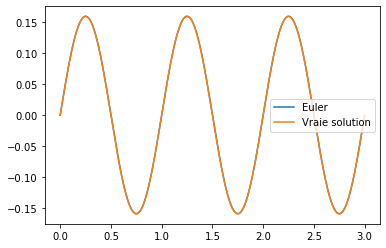

In [5]:
# Plot x(t) against t
# (If you know the theoretical solution, plot that one, too)

x_true = 1/omega*np.sin(omega*t)

fig, ax = plt.subplots()
ax.plot(t, x, label='Euler')
ax.plot(t, x_true, label='Vraie solution')
ax.legend()

# COMMENT: dt = 0.01 donne un résultat qui est 
# déjà pas mal, mais les courbes ne se superposent 
# pas encore. Du coup, il faudrait plutôt choisir
# dt = 0.001 par ex. (Comparez vous-mêmes si vous
# ne l'avez pas encore fait.)

#### Exercise 1.2

Répétez l'intégration pour deux autres valeurs de $\omega$ et plottez les différentes solutions ensemble.

In [6]:
# Repeat for lower oscillation freqency
omega1 = np.pi


In [7]:
# Repeat for increased oscillation freqency
omega2 = 4*np.pi


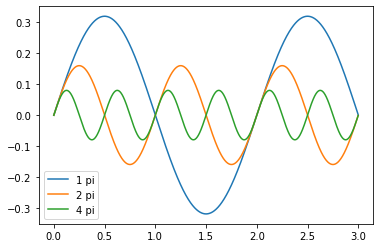

In [8]:
# redefine the function to take 
# the frequency as an additional argument
def f(x,t,omega):
    return np.cos(omega*t)

x1 = np.zeros(nt)
x2 = np.zeros(nt)
    
for i in range(nt-1):
    x1[i+1] = x1[i] + dt*f(x1[i],t[i],omega1)
    x2[i+1] = x2[i] + dt*f(x2[i],t[i],omega2)

# create plot
fig, ax = plt.subplots()
ax.plot(t, x1, label='%d pi'%(omega1/np.pi))
ax.plot(t, x, label='%d pi'%(omega/np.pi))
ax.plot(t, x2, label='%d pi'%(omega2/np.pi))
ax.legend()

#### Exercise 1.3

Intégrez numériquement l'équation différentielle suivante :

$$ \frac{dx}{dt} = - x + a \cos(\omega t) $$

avec la condition initiale $x(t=0)=10$ et avec les paramètres  $\omega = 2\pi$ et $a = 1$.

In [9]:
# Define the time step etc.

T = 10. 
dt = 0.001 
tb = np.arange(0,T,dt) # array of discrete times
nt = len(tb) # number of timesteps

# Define the function that returns the derivative

def f_damped(x,t):
    return -x + np.cos(omega*t)


# Solve iteratively for x(x)

xb = np.zeros(nt) 
xb[0] = 10. # implement initial condition!

for i in range(nt-1):
    xb[i+1] = xb[i] + dt*f_damped(xb[i],tb[i])
    
# NOTE: because I choose a longer time
# for the damped dynamics, I integrate 
# again the initial system

xa = np.zeros(nt)

for i in range(nt-1):
    xa[i+1] = xa[i] + dt*f(xa[i],tb[i],omega)

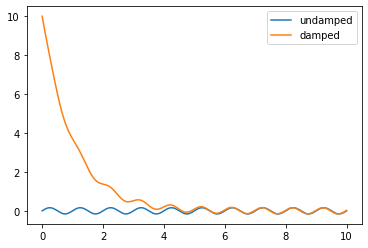

In [10]:
# Plot the numerically deterimined solution together with the solution
# in the undamped case (Exercise 1.1)

fig, ax = plt.subplots()
ax.plot(tb, xa, label='undamped')
ax.plot(tb, xb, label='damped')
ax.legend()

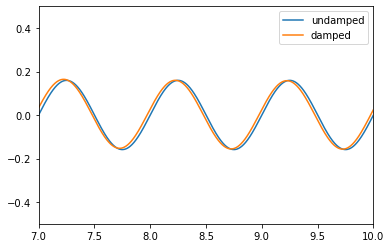

In [11]:
# Let's zoom in to see the (tiny) phase shift 
# after the decay of the initial condition

fig, ax = plt.subplots()
ax.plot(tb, xa, label='undamped')
ax.plot(tb, xb, label='damped')
ax.set_xlim(7,10)
ax.set_ylim(-0.5,0.5)
ax.legend()


### 2: Le modèle de FitzHugh-Nagumo

Dans le TD de cette semaine, nous avons étudié le modèle FitzHugh-Nagumo, qui décrit de manière simplifiée la décharge neuronale. Le modèle est spécifié par les équations 


$$ \frac{dV}{dt} = V - V^3/3 - W + I ,$$

$$ \frac{dW}{dt} = 0.08 (V+ 0.7 - 0.8 W), $$


Nous avons constaté qu'en fonction du courant $I$ injecté, le neurone décharge (génére des pics de potentiel $V$) ou reste silencieux (les variables ne varient pas dans le temps, après une rélaxation intitiale). 

#### Exercise 2.1

Déterminez, à deux décimales près, la valeur seuil de $I$ au-dessus de laquelle le neurone décharge de manière répétée. Pour éviter des PA singulier uniquement dus aux conditions initiales, choisissez des valeurs initiales $V(t=0)=-1$, $W(t=0)=0$.

**Astuce :** Vous pouvez réutilisez le code du TD pour l'implémentation du modèle. 

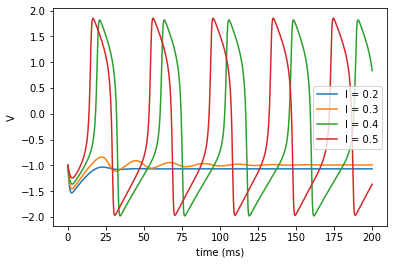

In [12]:
# Time discretization
dt = 0.01
T = 200.0
t = np.arange(0,T,dt)
nt = len(t)

# Definition of derivative fonctions that describe 
# the dynamics of the model variables
def dVdt(v,w,I):
    return v-(v**3)/3-w+I

def dWdt(v,w):
    return 0.08*(v+0.7-0.8*w)

# Create array with values of 
# the current covering the range
# where the neuron starts to 
# fire
# (refine iteratively)
Ivals = np.arange(0.2, 0.6, 0.1)


# Loop over different values of current
Vs = []
Ws = []

for I in Ivals:
    # create arrays for V and W
    V = np.zeros(nt)
    W = np.zeros(nt)

    # implement inital conditions
    # (W[0] is already 0)
    V[0]= -1

    for i in range(nt-1):
        V[i+1] = V[i] + dt * dVdt(V[i], W[i], I)
        W[i+1] = W[i] + dt * dWdt(V[i], W[i])

    Vs.append(V)
    Ws.append(W)
    
# Plot results
fig, ax = plt.subplots()
for i in range(len(Ivals)):
    ax.plot(t, Vs[i], label='I = %g'%Ivals[i])
ax.set_xlabel('time (ms)')
ax.set_ylabel('V')
ax.legend()

/Users/jranft/miniconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/jranft/miniconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


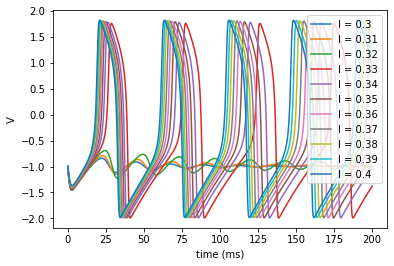

In [13]:

# We found above that the threshold is
# between 0.3 and 0.4 --> refine!
Ivals = np.arange(0.3, 0.4, 0.01)


# Loop over different values of current
Vs = []
Ws = []

for I in Ivals:
    # create arrays for V and W
    V = np.zeros(nt)
    W = np.zeros(nt)

    # implement inital conditions
    # (W[0] is already 0)
    V[0]= -1

    for i in range(nt-1):
        V[i+1] = V[i] + dt * dVdt(V[i], W[i], I)
        W[i+1] = W[i] + dt * dWdt(V[i], W[i])

    Vs.append(V)
    Ws.append(W)
    
# Plot results
fig, ax = plt.subplots()
for i in range(len(Ivals)):
    ax.plot(t, Vs[i], label='I = %g'%Ivals[i])
ax.set_xlabel('time (ms)')
ax.set_ylabel('V')
ax.legend()

In [14]:
# The critical current for which the neuron starts to
# fire is about 0.33 !

#### Exercise 2.2

Pour une valeur de $I$ au-dessus du seuil, c'est-à-dire quand le neurone décharge, plottez le potentiel de membrane $V$ contre la valeur de la variable lente $W$. Cela est appelé un "phase plot", qui permet de caractériser comment les deux variables co-évoluent. 

For I = 0.33, the neuron fires!


Text(0, 0.5, 'V')

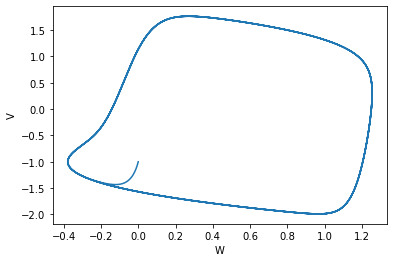

In [15]:
icrit = 3
print("For I = %g, the neuron fires!"%Ivals[icrit])

# We can plot the cyclic dynamics of the 
# FitzHugh-Nagumo neuron in the phase plane
# spanned by W and V: For each spike, the 
# dynamics follows once this path through
# the phasespace.

fig, ax = plt.subplots()
ax.plot(Ws[icrit], Vs[icrit])
ax.set_xlabel('W')
ax.set_ylabel('V')